# Linear Regression

The objective of linear regression is to minimize the cost function:

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2$$

where the hypothesis $h_\theta$ is given by the linear model:

$$ h_\theta = \theta^T x = \theta_0 + \theta_1 x_1 $$

The model's parameters are the $\theta_j$ values. These are the values that need to be adjusted to minimize cost $J(\theta)$.
One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update:

$$\theta_j := \theta_j - \frac{\alpha}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}$$ (simultaneously update $\theta_j$ for all $j$);
With each step of gradient descent, the parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost $J(\theta)$.

## Linear Regression with one variable
Predicting Profits of restaurant chain based on population of city.

In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [243]:
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

data = np.loadtxt('ex1data1.txt', delimiter=',')
X = data[:, 0]
y = data[:, 1]


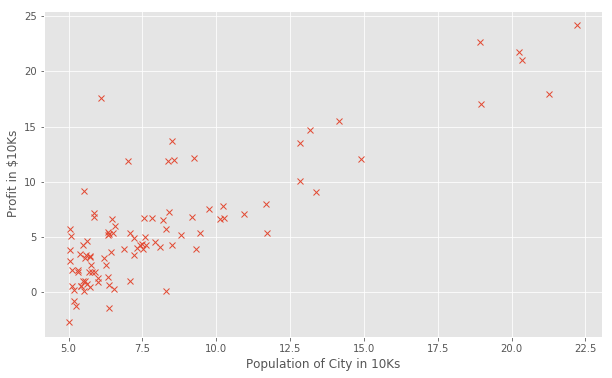

In [244]:
# create figure
fig = plt.figure()
# adjust figure's size
ax = fig.add_subplot(1, 1, 1) 
# plot X data and the relative labels y
ax.plot(X, y, 'x')
# set label y
plt.ylabel('Profit in $10Ks')
# set label x 
plt.xlabel('Population of City in 10Ks')
# show the figure
plt.show()

### Functions
#### Computing the cost $J(\theta)$ and Gradient Decent Algorithm
As you perform gradient decent to learn minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost.

In [245]:
def computeCost(X, y, theta):
    return (1/(2*y.size))*sum((np.dot(theta.T, X.T).T-y)**2)

def gradientDescent(X, y, theta, alpha, iterations):
    m = y.shape[0]
    J_history = np.zeros((iterations, 1))
    for i in range(iterations):
        hypotesis_minus_y = (np.matmul(theta.T, X.T).T-y).T
        theta = (theta.T - (alpha/m)*(np.matmul(hypotesis_minus_y, X))).T
        J_history[i] = computeCost(X, y, theta)
    return theta, J_history

### Running Linear Model

In [246]:
# y need to be shaped from (97,) to (97, 1)
y = y.reshape(y.shape[0], 1)
# it is not necessarily to reshape X since we add the intercept term and X become already right shaped into (97, 2)
#X = X.reshape(X.shape[0], 1)
X = np.c_[np.ones(X.shape[0]), X] # adding column of ones to X to account for theta_0 (the intercept)

In [247]:
theta = np.zeros((2, 1))
computeCost(X, y, theta) # cost at the very beginning with coefficients initialized at zero

array([32.07273388])

In [248]:
theta = np.array([[-1, 2]]).T
computeCost(X, y, theta) # cost with theta parameters setted to [-1, 2]

array([54.24245508])

In [249]:
theta = np.array([[0, 0]]).T
iterations = 1500
alpha = 0.01
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
print("Theta found by gradient descent: intercept={0}, slope={1}".format(theta[0],theta[1]))

Theta found by gradient descent: intercept=[-3.63029144], slope=[1.16636235]


#### Visualize the cost

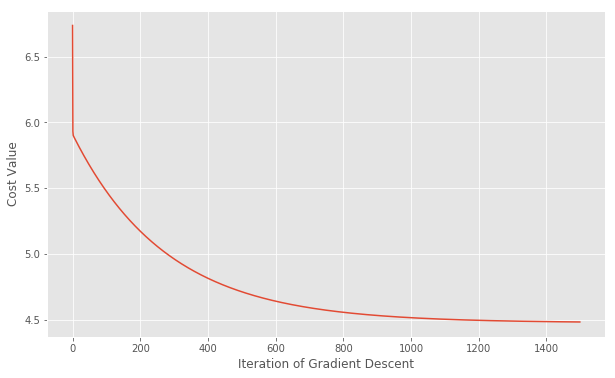

In [250]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(range(iterations), J_history)
plt.ylabel('Cost Value')
plt.xlabel('Iteration of Gradient Descent')
plt.show()

#### Plot the result

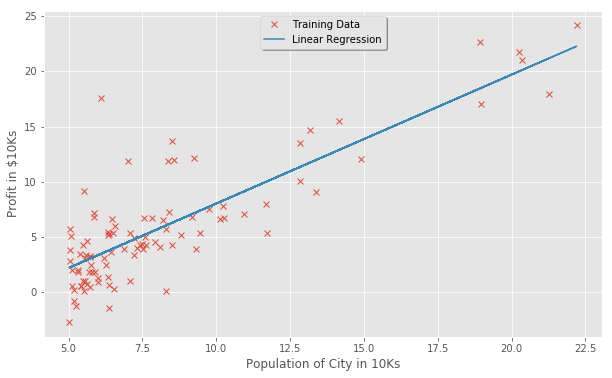

In [251]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 
# plot X data and the relative labels y
ax.plot(X[:, 1], y[:, 0], 'x', label='Training Data')
# plot the hypotesis line h = theta0*X[:, 0] + theta1*X[:, 1] 
ax.plot(X[:,1], np.matmul(X, theta), linestyle='-', label='Linear Regression')
# set the legend for the labels: 'Training Data' and 'Linear Regression'
legend = ax.legend(loc='upper center', shadow=True)
plt.ylabel('Profit in $10Ks')
plt.xlabel('Population of City in 10Ks')
plt.show()

### Make prediction

In [252]:
predict1 = np.matmul(np.array([[1, 3.5]]), theta)
print("For a population of 35000, we predict a profict of: " + str(predict1 * 10000))

For a population of 35000, we predict a profict of: [[4519.7678677]]


In [253]:
predict2 = np.matmul(np.array([[1, 7]]), theta)
print("For a population of 70000, we predict a profict of: " + str(predict2 * 10000))

For a population of 70000, we predict a profict of: [[45342.45012945]]


## Linear Regression with multiple variable
In this part, we will implement linear regression with multiple variables to predict the prices oh houses.
We will consider now a dataset containing a training set of housing prices in Portland, Oregon.
The first column is the size of the house (in square feet), the second column is the number of bedrooms, an the third column is the price of the house.

In [254]:
data = np.loadtxt('ex1data2.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2]
y = y.reshape(y.shape[0], 1)

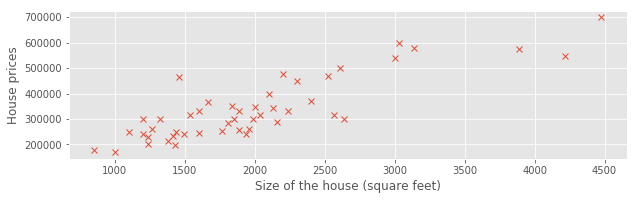

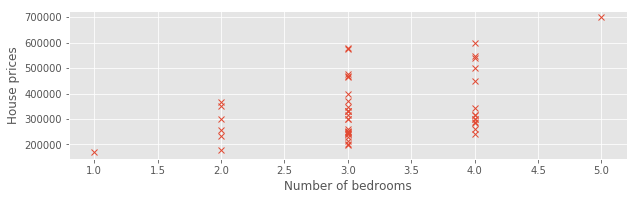

In [255]:
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1) 
ax.plot(X[:, 0], y, 'x')
plt.ylabel('House prices')
plt.xlabel('Size of the house (square feet)')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(2, 1, 1) 
ax.plot(X[:, 1], y, 'x')
plt.ylabel('House prices')
plt.xlabel('Number of bedrooms')
plt.show()



By looking at the values, note that house size are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient decent converge much more quikly.

In [256]:
def featureNormalize(X):
    average = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - average)/sigma
    return X_norm, average, sigma

In [257]:
X, average, sigma = featureNormalize(X)

In [258]:
# adding the intercept
X = np.c_[np.ones(X.shape[0]), X]

#### Running Gradient Decent

In [265]:
alpha = 0.01
interations = 1500
theta = np.zeros((X.shape[1], 1))
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
theta

array([[340412.56301439],
       [109370.05670466],
       [ -6500.61509507]])

#### Visualizing the convergence graph

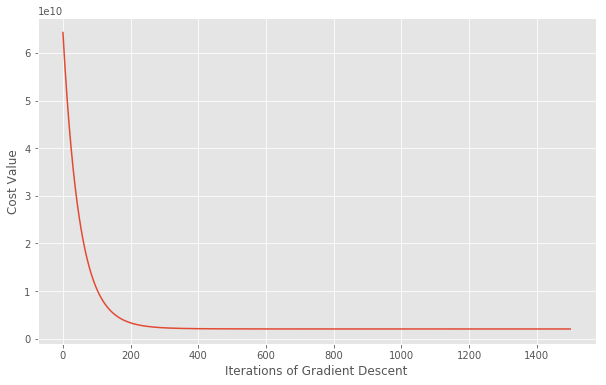

In [286]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(range(iterations), J_history)
plt.ylabel('Cost Value')
plt.xlabel('Iterations of Gradient Descent')
plt.show()

### Make Prediction
Estimate the price of a 1650 sq-ft, 3 br house:


In [285]:
predict = np.array([[1650, 3]])
predict = (predict - average) / sigma

In [284]:
# adding the intercept
predict = np.c_[np.array([1]), predict]

In [283]:
print(np.matmul(predict, theta))

[[293098.46667577]]


## Normal Equation

It is possible to show that the same optimized parameters found implemenating Gradient Descent can be calculated in an elegant, efficient and closed form, using linear algebra. Specifically:
$$\theta = (X^T X)^{-1} X^Ty$$
Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no "loop until convergence" like in gradient descent.
This equation is preferred that Gradient Decent when the dataset is < 10000, otherwise Gradient Decent is preferred since it will converge faster. Furthermore, if the $X^T X$ does not admit inverse, this method cannot be applied.

In [299]:
def normalEquation(X, y):
    XTX_inv= np.linalg.inv(np.matmul(X.T, X))
    XTy = np.matmul(X.T, y)
    theta = np.matmul(XTX_inv, XTy)
    return theta

In [300]:
data = np.loadtxt('ex1data2.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2]
y = y.reshape(y.shape[0], 1)

In [303]:
# adding the intercept
X = np.c_[np.ones(X.shape[0]), X]

In [306]:
theta = normalEquation(X, y)
theta

array([[89597.9095428 ],
       [  139.21067402],
       [-8738.01911233]])

In [312]:
predict = np.array([[1, 1650, 3]])
np.matmul(predict, theta)

array([[293081.46433489]])